**1. Mô phỏng quy hoạch tần số**
- Viết chương trình Python để hiển thị sơ đồ cell với các giá trị K=3, 7, 12. 
- Mô phỏng cách xác định vị trí của các cell đồng kênh bằng cách sử dụng công thức
K = i ^ 2 + i.j + j ^ 2


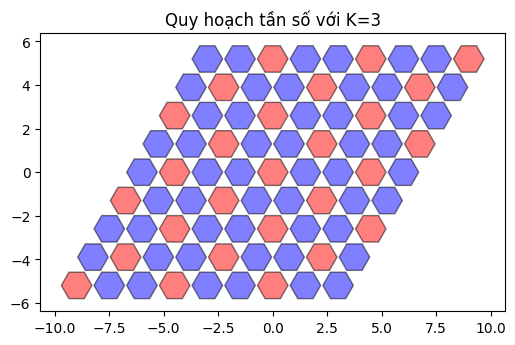

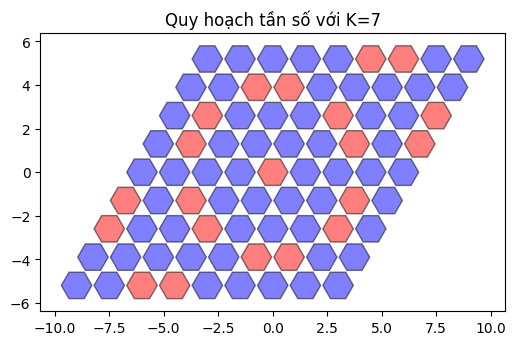

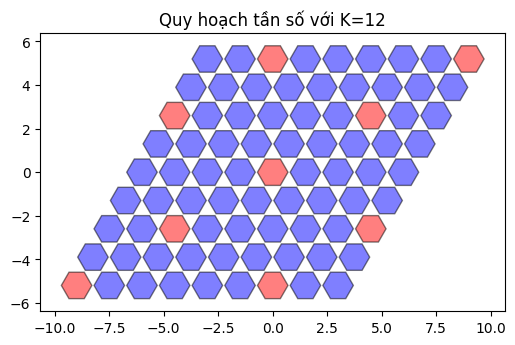

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def draw_hexagon(x, y, size, color):
    """Vẽ một ô lục giác tại tọa độ (x, y) với kích thước và màu sắc xác định."""
    angles = np.linspace(0, 2 * np.pi, 7)
    x_hex = x + size * np.cos(angles)
    y_hex = y + size * np.sin(angles)
    plt.fill(x_hex, y_hex, color, edgecolor='k', alpha=0.5)

def plot_cells(K):
    """Tạo lưới tế bào và xác định các cell đồng kênh theo hệ số tái sử dụng K."""
    radius = 4
    a = 1.5  # Khoảng cách giữa các cell
    plt.figure(figsize=(6, 6))
    
    for i in range(-radius, radius + 1):
        for j in range(-radius, radius + 1):
            x = a * (i + j / 2)
            y = j * np.sqrt(3) / 2 * a
            color = 'b' if (i**2 + i * j + j**2) % K != 0 else 'r'
            draw_hexagon(x, y, 0.7, color)
    
    plt.gca().set_aspect('equal')
    plt.title(f"Quy hoạch tần số với K={K}")
    plt.show()

# Chạy chương trình với ba giá trị K khác nhau để quan sát sự khác biệt.
for K in [3, 7, 12]:
    plot_cells(K)


Nhận xét:
- K = 3: Số lượng cell đồng kênh (màu đỏ) xuất hiện nhiều nhất. Khoảng cách giữa các cell đồng kênh ngắn hơn, có thể dẫn đến mức nhiễu đồng kênh cao hơn. Quy hoạch tần số kém hiệu quả hơn do các cell sử dụng cùng tần số quá gần nhau.
- K = 7: Số lượng cell đồng kênh giảm đi so với K = 3. Khoảng cách giữa các cell đồng kênh lớn hơn, giúp giảm nhiễu so với trường hợp K =3. Cấu trúc lưới có vẻ cân đối hơn, thể hiện việc quản lý tần số hiệu quả hơn.
- K = 12: Số lượng cell đồng kênh ít nhất, khoảng cách giữa các cell đồng kênh xa nhất.Nhiễu đồng kênh được giảm đáng kể, giúp cải thiện chất lượng truyền tín hiệu.


**2. Tính toán nhiễu đồng kênh bằng Python**
- Viết một chương trình để tính toán mức nhiễu đồng kênh dựa trên khoảng cách tái sử dụng D. 
- So sánh nhiễu giữa các giá trị K=7, K=12


In [4]:
def co_channel_interference(K, R=1):
    """Tính toán mức nhiễu đồng kênh dựa trên khoảng cách tái sử dụng D."""
# tính khoảng cách tái sử dụng D
    D = R * np.sqrt(3 * K) 
# Mức nhiễu tỷ lệ nghịch với bình phương khoảng cách
    I = 1 / (D ** 2)  
    return D, I

# So sánh nhiễu giữa các giá trị K=7, K=12
for K in [7, 12]:
    D, I = co_channel_interference(K)
    print(f"K={K}: Khoảng cách tái sử dụng D = {D:.2f}, Mức nhiễu I = {I:.4f}")

K=7: Khoảng cách tái sử dụng D = 4.58, Mức nhiễu I = 0.0476
K=12: Khoảng cách tái sử dụng D = 6.00, Mức nhiễu I = 0.0278


Kết luận:
- Với K = 7: Khoảng cách tái sử dụng không quá xa, nên mức nhiễu vẫn còn tương đối cao. Đây là một giá trị cân bằng giữa hiệu suất sử dụng phổ và mức nhiễu.
- Với K = 12: Khoảng cách lớn hơn giúp giảm nhiễu nhưng yêu cầu nhiều tài nguyên phổ tần hơn. Độ phủ sóng có thể cần điều chỉnh để đảm bảo kết nối giữa các cell.